In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# New section

 **DATA Collection and pre-processing**

In [ ]:
m_dataset=pd.read_csv('/content/Monitor_data.csv')

# New Section

In [ ]:
#inspecting first 5 rows
m_dataset.head()

,Brand,Display_Type,Display_Resolution,Display_size,Response Time,Refresh Rate,Brigthness,Power_Consumption,Warrantly,Price
0,LG,4K UHD,5120 x 2160,34.0,5.0,60,450,80.0,3,79450.0
1,LG,4K UHD,3840 x 2160,43.0,8.0,60,400,95.0,3,79400.0
2,LG,4K UHD,3840 x 2160,43.0,8.0,60,400,95.0,3,79400.0
3,Dell,4K UHD,3840 x 2160,31.5,5.0,60,400,50.0,3,79300.0
4,LG,2K QHD LED,3440 x 1440,34.0,1.0,144,320,80.0,3,78500.0


In [ ]:
#shape of the data
m_dataset.shape

(294, 10)

In [ ]:
#info about the dataset
m_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               294 non-null    object 
 1   Display_Type        294 non-null    object 
 2   Display_Resolution  294 non-null    object 
 3   Display_size        294 non-null    float64
 4   Response Time       294 non-null    float64
 5   Refresh Rate        294 non-null    int64  
 6   Brigthness          294 non-null    int64  
 7   Power_Consumption   294 non-null    float64
 8   Warrantly           294 non-null    int64  
 9   Price               294 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 23.1+ KB


In [ ]:
m_dataset.isnull().sum()

Brand                 0
Display_Type          0
Display_Resolution    0
Display_size          0
Response Time         0
Refresh Rate          0
Brigthness            0
Power_Consumption     0
Warrantly             0
Price                 0
dtype: int64

In [ ]:
#checking the distribution
print(m_dataset.Brand.value_counts())
print(m_dataset.Display_Type.value_counts())
print(m_dataset.Display_Resolution.value_counts())



Dell       60
HP         60
LG         59
Asus       59
Samsung    56
Name: Brand, dtype: int64
FHD LED        112
FHD IPS         59
CURVED VA       30
4K UHD          28
HD LED          23
2K QHD LED      18
CURVED LED      12
2K WQHD LED     12
Name: Display_Type, dtype: int64
1920 x 1080    163
2560 x 1440     52
3840 x 2160     39
1366 x 768      18
3440 x 1440      9
5120 x 2160      6
1600 x 900       4
1280 x 1024      2
2560 x 1600      1
Name: Display_Resolution, dtype: int64


In [ ]:

#encoding
m_dataset.replace({'Brand':{'HP':0,'Dell':1,'LG':2,'Asus':3,'Samsung':4}},inplace=True)
m_dataset.replace({'Display_Type':{'FHD LED':0,'FHD IPS':1,'HD LED':2,'CURVED VA':3,
'CURVED LED':4,'4K UHD':5,'2K QHD LED':6,'2K WQHD LED':7,

}},inplace=True)


m_dataset.replace({'Display_Resolution':{'1920 x 1080':0,'2560 x 1440':1,'3840 x 2160':2,'1366 x 768':3,
'3440 x 1440':4,'5120 x 2160':5,'1600 x 900':6,'1280 x 1024':7,'2560 x 1600':8,
}},inplace=True)





In [ ]:
m_dataset.head()

,Brand,Display_Type,Display_Resolution,Display_size,Response Time,Refresh Rate,Brigthness,Power_Consumption,Warrantly,Price
0,2,5,5,34.0,5.0,60,450,80.0,3,79450.0
1,2,5,2,43.0,8.0,60,400,95.0,3,79400.0
2,2,5,2,43.0,8.0,60,400,95.0,3,79400.0
3,1,5,2,31.5,5.0,60,400,50.0,3,79300.0
4,2,6,4,34.0,1.0,144,320,80.0,3,78500.0


Splitting data and target

In [ ]:

#seperating the Predicted feature from the target feature

dependent='Price'
independent=m_dataset.columns.tolist()
independent.remove(dependent)
X=m_dataset[independent].values
Y=m_dataset[dependent].values
Y=Y.reshape(-1,1)




#X=m_dataset.drop(['Price','Display_Resolution'],axis=1)
#Y=m_dataset['Price']

In [ ]:
print(X)

[[  2.   5.   5. ... 450.  80.   3.]
 [  2.   5.   2. ... 400.  95.   3.]
 [  2.   5.   2. ... 400.  95.   3.]
 ...
 [  1.   1.   7. ... 250.  14.   3.]
 [  0.   1.   0. ... 250.  68.   3.]
 [  1.   2.   3. ... 200.  11.   3.]]


Splitting training and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)
mm=MinMaxScaler()
# data normaliztion
X_train=mm.fit_transform(X_train)
X_test=mm.fit_transform(X_test)
Y_test=mm.fit_transform(Y_test)
Y_train=mm.fit_transform(Y_train)

print(Y_train)


[[0.24993631]
 [0.54929936]
 [0.15541401]
 [0.19872611]
 [0.49090446]
 [0.21146497]
 [0.30318471]
 [0.43949045]
 [0.20993631]
 [0.33121019]
 [0.89248408]
 [0.02624204]
 [0.01528662]
 [0.36636943]
 [0.27515924]
 [0.51821656]
 [0.28993631]
 [0.17070064]
 [0.22420382]
 [0.3110828 ]
 [0.35732484]
 [0.45350318]
 [0.90955414]
 [0.5044586 ]
 [0.3388535 ]
 [0.55490446]
 [0.39640764]
 [0.35159236]
 [0.41528662]
 [0.1477707 ]
 [0.58089172]
 [0.2833121 ]
 [0.76815287]
 [0.45834395]
 [0.24968153]
 [0.37961783]
 [0.3133758 ]
 [0.25732484]
 [0.24968153]
 [0.3388535 ]
 [0.58089172]
 [0.97579618]
 [0.29808917]
 [0.15271338]
 [0.30063694]
 [0.24968153]
 [0.2343949 ]
 [0.20636943]
 [0.76127389]
 [0.04433121]
 [0.42802548]
 [0.32025478]
 [0.79464968]
 [0.73375796]
 [0.03057325]
 [0.3133758 ]
 [0.5322293 ]
 [0.04840764]
 [0.02038217]
 [0.36433121]
 [0.55541401]
 [0.85395822]
 [0.40254777]
 [0.82292994]
 [0.5044586 ]
 [0.00509554]
 [0.27515924]
 [0.75923567]
 [0.35617834]
 [0.03872611]
 [0.12738854]
 [0.19

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])




264
30


In [ ]:
#print(sorted(Counter(Y_train).items()))
ros=RandomOverSampler(random_state=42)


**MODEL TRAINING**

**1.Linear Regression**

In [ ]:
#load model
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**MODEL EVALUATION**

In [ ]:
#prediction on training data

training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
#R sqaured error,mean sqaure error,MAE ,RMSE
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error ',error_score)
error_score1=metrics.mean_squared_error(Y_train,training_data_prediction)
print('Mean sqaure  error ',error_score1)
error_score3=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('Mean Absolute  error ',error_score3)

error_score4=metrics.mean_squared_error(Y_train,training_data_prediction)
print('Root Mean sqaure  error ',error_score4)



R squared error  0.5241271517392831
Mean sqaure  error  0.02622588560464667
Mean Absolute  error  0.11990789064481794
Root Mean sqaure  error  0.02622588560464667


**Visualize the actual price and predicted price**

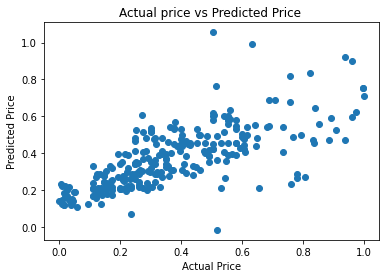

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()


In [ ]:
#prediction on test data
test_data_prediction=lin_reg_model.predict(X_test)


In [ ]:
#R sqaured error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error ',error_score)
error_score1=metrics.mean_squared_error(Y_test,test_data_prediction)
print('Mean sqaure  error ',error_score1)
error_score3=metrics.mean_absolute_error(Y_test,test_data_prediction)
print('Mean Absolute  error ',error_score3)

error_score4=metrics.mean_squared_error(Y_test,test_data_prediction)
print('Root Mean sqaure  error ',error_score4)


R squared error  0.5270490825619254
Mean sqaure  error  0.03497527880622799
Mean Absolute  error  0.13238688272642377
Root Mean sqaure  error  0.03497527880622799


Lasso Regression


In [ ]:
#load model
lass_reg_model= Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

**MODEL EVALUATION**

In [ ]:
#prediction on training data

training_data_prediction=lass_reg_model.predict(X_train)

In [ ]:
#R sqaured error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error ',error_score)
error_score1=metrics.mean_squared_error(Y_train,training_data_prediction)
print('Mean sqaure  error ',error_score1)
error_score3=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('Mean Absolute  error ',error_score3)

error_score4=metrics.mean_squared_error(Y_train,training_data_prediction)
print('Root Mean sqaure  error ',error_score4)


R squared error  0.0
Mean sqaure  error  0.05511111991470099
Mean Absolute  error  0.19061761960952903
Root Mean sqaure  error  0.05511111991470099


**Visualize the actual price and predicted price**

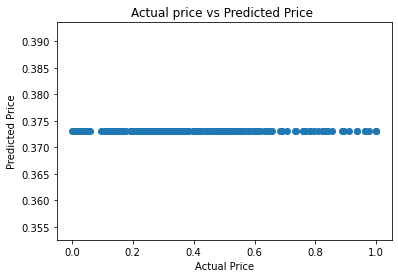

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()


In [ ]:
#prediction on test data
test_data_prediction=lass_reg_model.predict(X_test)


In [ ]:
#R sqaured error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error ',error_score)
error_score1=metrics.mean_squared_error(Y_test,test_data_prediction)
print('Mean sqaure  error ',error_score1)
error_score3=metrics.mean_absolute_error(Y_test,test_data_prediction)
print('Mean Absolute  error ',error_score3)

error_score4=metrics.mean_squared_error(Y_test,test_data_prediction)
print('Root Mean sqaure  error ',error_score4)


R squared error  -1.8126155418629608e-05
Mean sqaure  error  0.07395252125321647
Mean Absolute  error  0.22277994848363847
Root Mean sqaure  error  0.07395252125321647


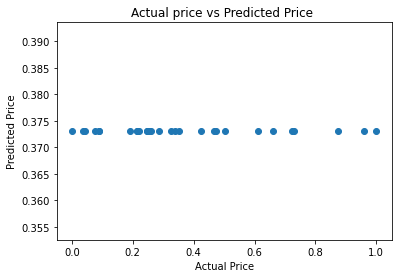

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()

**DEcision Tree**

In [ ]:
#load model
dt=DecisionTreeRegressor(random_state=42)



In [ ]:

dt.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#prediction on training data

training_data_prediction=dt.predict(X_train)

In [ ]:
#R sqaured error
error_score=metrics.r2_score(Y_train,training_data_prediction)


print('R squared error ',error_score)
error_score1=metrics.mean_squared_error(Y_train,training_data_prediction)
print('Mean sqaure  error ',error_score1)
error_score3=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('Mean Absolute  error ',error_score3)

error_score4=metrics.mean_squared_error(Y_train,training_data_prediction)
print('Root Mean sqaure  error ',error_score4)





R squared error  0.9940608701352542
Mean sqaure  error  0.00032731209816498375
Mean Absolute  error  0.0033533024512642363
Root Mean sqaure  error  0.00032731209816498375


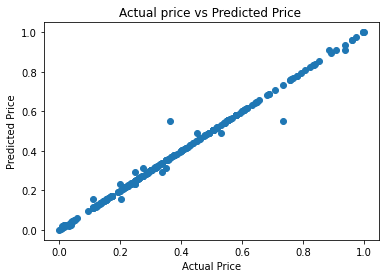

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [ ]:
#prediction on test data
test_data_prediction=dt.predict(X_test)
#R sqaured error
error_score=metrics.r2_score(Y_test,test_data_prediction)
error_score1=metrics.mean_squared_error(Y_test,test_data_prediction)
error_score3=metrics.mean_absolute_error(Y_test,test_data_prediction)

error_score4=metrics.mean_squared_error(Y_test,test_data_prediction)

print('R squared error ',error_score)
print('mean Sqaured Error',error_score1)
print('Mean Absolute  error ',error_score3)
print('Root Mean sqaure  error ',error_score4)


R squared error  0.36368813367740194
mean Sqaured Error 0.047056013873274925
Mean Absolute  error  0.16056443039753246
Root Mean sqaure  error  0.047056013873274925


**Random Forest**

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [ ]:
y_pred=rf.predict(X_train)

In [ ]:
#R sqaured error
error_score=metrics.r2_score(Y_train,y_pred)

error_score1=metrics.mean_squared_error(Y_train,y_pred)
error_score3=metrics.mean_absolute_error(Y_train,y_pred)

error_score4=metrics.mean_squared_error(Y_train,y_pred)

print('R squared error ',error_score)
print('mean Sqaured Error',error_score1)
print('Mean Absolute  error ',error_score3)
print('Root Mean sqaure  error ',error_score4)



R squared error  0.9456257329323398
mean Sqaured Error 0.002996626752639798
Mean Absolute  error  0.037909618342938024
Root Mean sqaure  error  0.002996626752639798


In [ ]:
#prediction on test data
y_tpred=rf.predict(X_test)
#R sqaured error
error_score=metrics.r2_score(Y_test,y_tpred)
error_score1=metrics.mean_squared_error(Y_test,y_tpred)
error_score3=metrics.mean_absolute_error(Y_test,y_tpred)

error_score4=metrics.mean_squared_error(Y_test,y_tpred)



print('R squared error ',error_score)
print('mean Sqaured Error',error_score1)
print('Mean Absolute  error ',error_score3)
print('Root Mean sqaure  error ',error_score4)


R squared error  0.4789714126158765
mean Sqaured Error 0.03853067926897693
Mean Absolute  error  0.1513024549815899
Root Mean sqaure  error  0.03853067926897693


**SVM REGressor**

In [ ]:
#
regressor=SVR(kernel='poly')

In [ ]:
regressor.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [ ]:
Y_pred=regressor.predict(X_train)

In [ ]:
#R sqaured error
error_score=metrics.r2_score(Y_train,Y_pred)

error_score1=metrics.mean_squared_error(Y_train,Y_pred)
error_score3=metrics.mean_absolute_error(Y_train,Y_pred)

error_score4=metrics.mean_squared_error(Y_train,Y_pred)
print('R squared error ',error_score)
print('mean Sqaured Error',error_score1)
print('Mean Absolute  error ',error_score3)
print('Root Mean sqaure  error ',error_score4)




R squared error  0.6715356830013404
mean Sqaured Error 0.018102036361813487
Mean Absolute  error  0.09898803162642275
Root Mean sqaure  error  0.018102036361813487


In [ ]:
#prediction on test data
y_tpred=rf.predict(X_test)
#R sqaured error
error_score=metrics.r2_score(Y_test,y_tpred)
error_score1=metrics.mean_squared_error(Y_test,y_tpred)
error_score3=metrics.mean_absolute_error(Y_test,y_tpred)

error_score4=metrics.mean_squared_error(Y_test,y_tpred)
print('R squared error ',error_score)
print('mean Sqaured Error',error_score1)
print('Mean Absolute  error ',error_score3)
print('Root Mean sqaure  error ',error_score4)



R squared error  0.4789714126158765
mean Sqaured Error 0.03853067926897693
Mean Absolute  error  0.1513024549815899
Root Mean sqaure  error  0.03853067926897693


**K-Nearest Neighbours**


In [ ]:
knn=KNeighborsRegressor(n_neighbors=15)


In [ ]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
Y_pred=knn.predict(X_train)

In [ ]:
#R sqaured error
error_score=metrics.r2_score(Y_train,Y_pred)

error_score1=metrics.mean_squared_error(Y_train,Y_pred)
error_score3=metrics.mean_absolute_error(Y_train,Y_pred)

error_score4=metrics.mean_squared_error(Y_train,Y_pred)
print('R squared error ',error_score)
print('mean Sqaured Error',error_score1)
print('Mean Absolute  error ',error_score3)
print('Root Mean sqaure  error ',error_score4)


R squared error  0.5865761106636718
mean Sqaured Error 0.02278425354081646
Mean Absolute  error  0.11430225587081003
Root Mean sqaure  error  0.02278425354081646


In [ ]:
#prediction on test data
y_tpred=knn.predict(X_test)
#R sqaured error
error_score=metrics.r2_score(Y_test,y_tpred)
error_score1=metrics.mean_squared_error(Y_test,y_tpred)
error_score3=metrics.mean_absolute_error(Y_test,y_tpred)

error_score4=metrics.mean_squared_error(Y_test,y_tpred)
print('R squared error ',error_score)
print('mean Sqaured Error',error_score1)
print('Mean Absolute  error ',error_score3)
print('Root Mean sqaure  error ',error_score4)


R squared error  0.43242601046077256
mean Sqaured Error 0.04197276671927967
Mean Absolute  error  0.15424260277520926
Root Mean sqaure  error  0.04197276671927967
